# Forex predictions using Machine Learning
# Loading and preparing data

In [1]:
# import pandas as pd
# from config_bo import EUR_USD
# df = pd.read_csv(EUR_USD)
# df.tail()

,Gmt time,open,high,low,close,volume
173385,15.04.2023 19:00:00.000,1.09922,1.09922,1.09922,1.09922,0.0
173386,15.04.2023 20:00:00.000,1.09922,1.09922,1.09922,1.09922,0.0
173387,15.04.2023 21:00:00.000,1.09922,1.09922,1.09922,1.09922,0.0
173388,15.04.2023 22:00:00.000,1.09922,1.09922,1.09922,1.09922,0.0
173389,15.04.2023 23:00:00.000,1.09922,1.09922,1.09922,1.09922,0.0


In [18]:
#import nvda 
#Import ticker
import os
import pandas as pd

my_custom_tickers=[]
ticker ="NVDA.csv"
directory = os.path.expanduser('~/Documents/tempTestFiles2')
file_path = os.path.join(directory, ticker) 
df = pd.read_csv(file_path)


In [20]:
df.rename(columns={'Date': 'date', 'Open': 'open','High': 'high', 'Low': 'low','Close':'close','Volume':'volume'}, inplace=True)

In [23]:
df

,date,open,high,low,close,volume
0,2003-12-29,1.9308,1.9817,1.9217,1.9750,75676800.0
1,2003-12-30,1.9542,2.0167,1.9525,1.9792,55118400.0
2,2003-12-31,1.9783,1.9875,1.9017,1.9333,49736400.0
3,2004-01-02,1.9642,1.9908,1.9233,1.9233,43640400.0
4,2004-01-05,1.9525,1.9992,1.9350,1.9858,57544800.0
...,...,...,...,...,...,...
5051,2024-01-29,612.4500,624.8900,609.0700,624.6500,23019819.0
5052,2024-01-30,629.0500,634.9300,622.6000,627.7400,28714519.0
5053,2024-01-31,614.4000,622.7000,607.0000,615.2700,31427138.0
5054,2024-02-01,621.0700,631.9100,616.5000,630.2700,25952593.0


In [24]:
#for yahoo
#Check if any zero volumes are available, and remove for the consistency of data 
indexZeros = df[ df['volume'] == 0 ].index

df.drop(indexZeros , inplace=True)
df.loc[(df["volume"] == 0 )]
df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [17]:
help(ta.midprice)



Help on function midprice in module pandas_ta.overlap.midprice:

midprice(high, low, length=None, talib=None, offset=None, **kwargs)
    Indicator: Midprice



In [34]:
import numpy as np
import pandas_ta as ta
#df.ta.indicators()  to help with telling you which indicators are available
#help(ta.atr) and tell you what they do  
df['ATR'] = df.ta.atr(length=20) #adr will take into account last 20 bars 
df['RSI'] = df.ta.rsi() # no parameters so will get the default 
df['Average'] = df.ta.midprice() #midprice originally was midprice(lenght =1 ) but there is a breaking change and is null now, anyway you can do absolute diff clone and open and divide by 2
df['MA40'] = df.ta.sma(length=40)
df['MA80'] = df.ta.sma(length=80)
df['MA160'] = df.ta.sma(length=160)

from scipy.stats import linregress
def get_slope(array): # the slope is calculated to determine the trend, for instance, a positive slope for a moving average would indicate an upward trend in the data, while a negative slope would suggest a downward trend. 
    y = np.array(array)  
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y) #is a linear regression on the data 
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6 #last six values to guess the slope can be more o less 
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeMA40'] = df['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA80'] = df['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA160'] = df['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [29]:
df.tail()

,date,open,high,low,close,volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
5051,2024-01-29,612.45,624.89,609.07,624.65,23019819.0,15.587940,82.289675,587.945,516.33050,486.048500,464.107375,3.301093,2.217868,1.419907,7.777143,0.003361
5052,2024-01-30,629.05,634.93,622.60,627.74,28714519.0,15.425043,82.762126,591.165,520.33150,488.390125,465.607625,3.488857,2.242139,1.461291,5.083286,-0.096399
5053,2024-01-31,614.40,622.70,607.00,615.27,31427138.0,15.690791,74.163779,598.000,524.02200,490.495000,466.985437,3.595157,2.232761,1.466277,3.170286,-1.438528
5054,2024-02-01,621.07,631.91,616.50,630.27,25952593.0,15.738251,77.228460,603.590,528.40125,492.653125,468.360750,3.788336,2.223082,1.449716,4.207429,-1.475154
5055,2024-02-02,639.74,666.00,636.90,661.60,32804775.0,16.737839,82.024572,625.925,533.29975,495.264000,469.808437,4.075864,2.281107,1.432263,7.254857,-0.378519


# Target categories

In [35]:
#Target flexible way
pipdiff = 500*1e-5 #for TP   # to guess the price # This is the difference in price that you’re looking for in your target. It’s set to 500*1e-5, which is equivalent to 0.005. In the context of forex trading, a pip is a unit of measure for currency movement and is the fourth decimal place in most currency pairs.
SLTPRatio = 2  #I would call win loss ratio #pipdiff/Ratio gives SL     #This is the Stop Loss to Take Profit ratio. It’s set to 2, which means that the stop loss is half the size of the take profit target. This is a common risk management strategy in trading.

def mytarget(barsupfront, df1): #barsupfront  is the number of names  # This function is used to determine the trend of the market. It checks if the price has moved up or down by a certain amount (defined by pipdiff and SLTPRatio) in the next few bars (defined by barsupfront). If it has, it categorizes the trend as up (2) or down (1). If the price hasn’t moved significantly, it categorizes the trend as unclear (0).
    #initialize variables 
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            #Within each iteration, it calculates valueOpenLow and valueOpenHigh based on the difference between the opening price (open[line+1]) and the low and high prices of the subsequent bars (low[line+i] and high[line+i]).
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow) # representing the largest downward movement
            valueOpenHigh = min(value2, valueOpenHigh) # representing the smallest upward movement 
        

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend price is going down without touching the stop loss(is a short) but going in direction of take profit
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend (viceversa)
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [40]:
# mytarget(barsfront to take into account, dataframe)
df['mytarget'] = mytarget(16, df)
df.head()

,date,open,high,low,close,volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
0,2003-12-29,1.9308,1.9817,1.9217,1.9750,75676800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,2003-12-30,1.9542,2.0167,1.9525,1.9792,55118400.0,NaN,NaN,1.96920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2003-12-31,1.9783,1.9875,1.9017,1.9333,49736400.0,NaN,NaN,1.95920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2004-01-02,1.9642,1.9908,1.9233,1.9233,43640400.0,NaN,NaN,1.94625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2004-01-05,1.9525,1.9992,1.9350,1.9858,57544800.0,NaN,NaN,1.96125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Quick analysis example

/var/folders/k5/h1ckqhvs6kb6sb1p9b_90n1w0000gn/T/ipykernel_4184/570130809.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


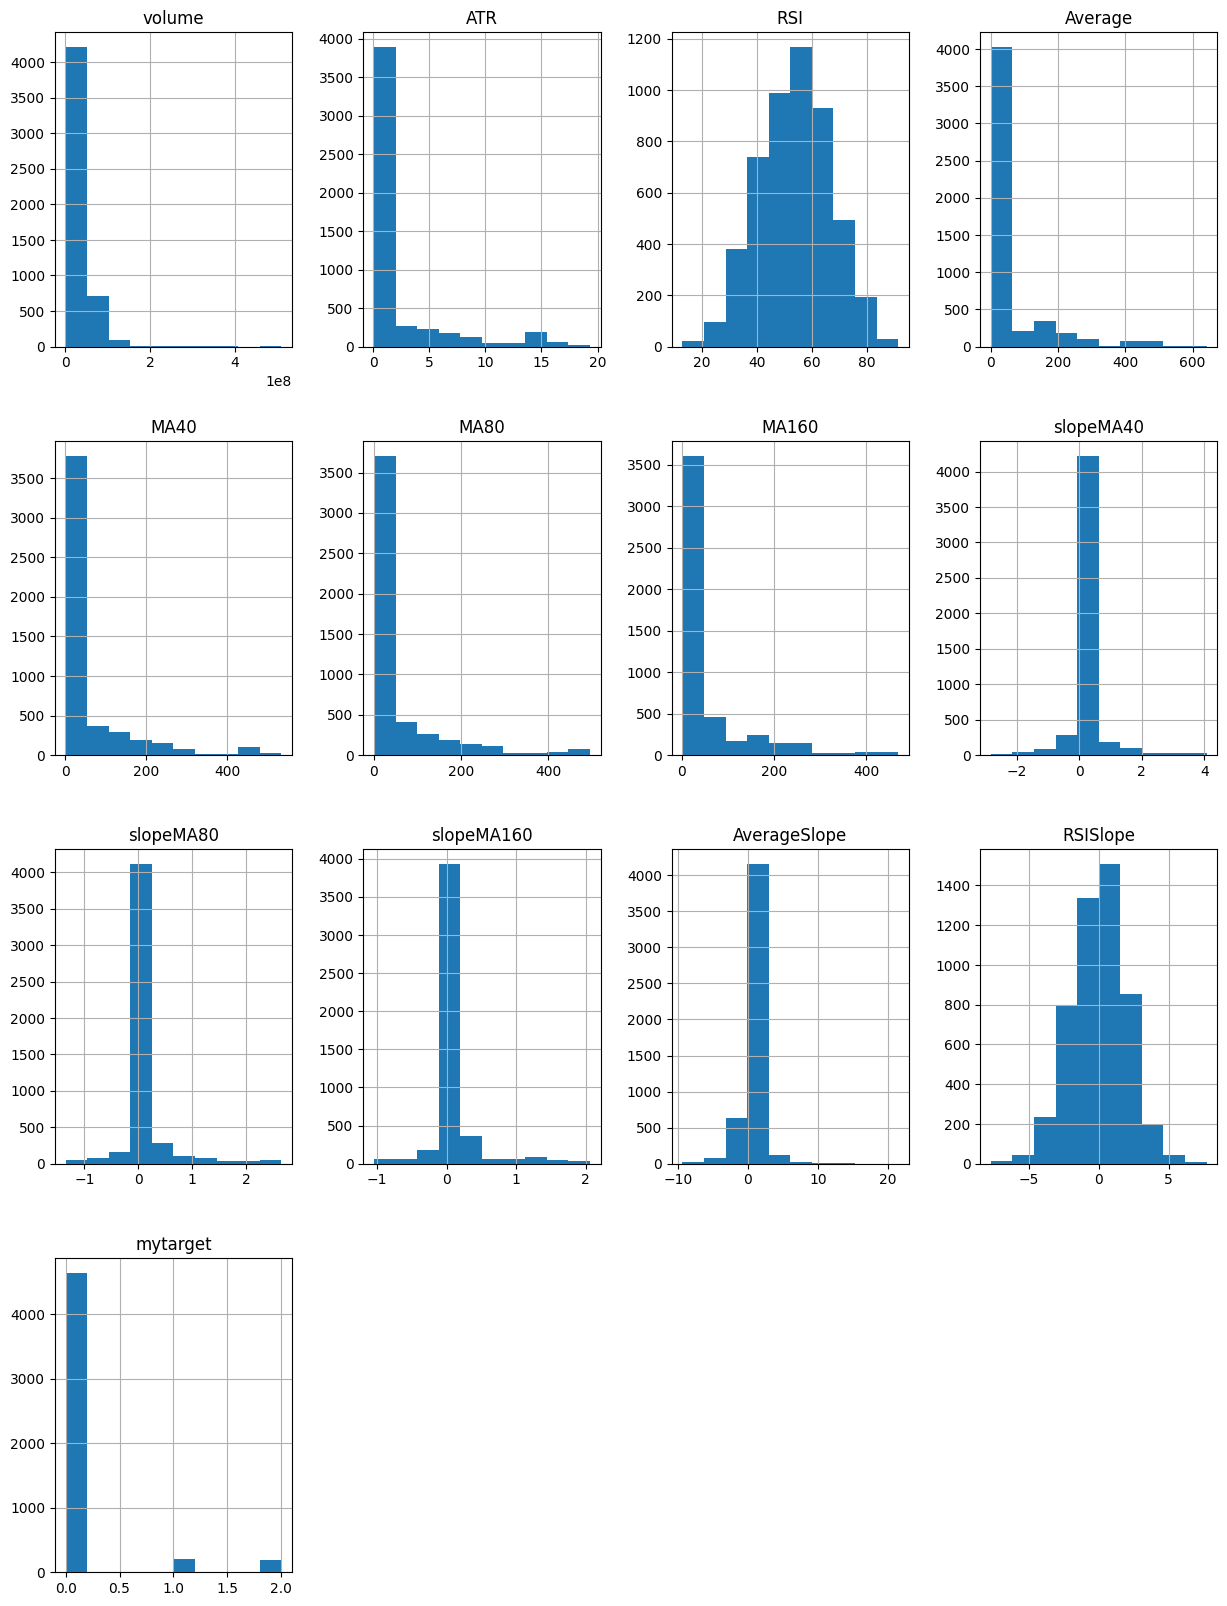

In [37]:
import matplotlib.pyplot as plt #Histograms provide a visual representation of data distribution. Each bar in a histogram represents the tabulated frequency at each interval/bin. The x-axis represents the data to be measured, while the y-axis represents the frequency count. By looking at the shape of the bars, you can get a general idea about the range of values, the central tendency, and the spread of the data.
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= df[['volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

## Can we use the RSI alone as a trend indicator?

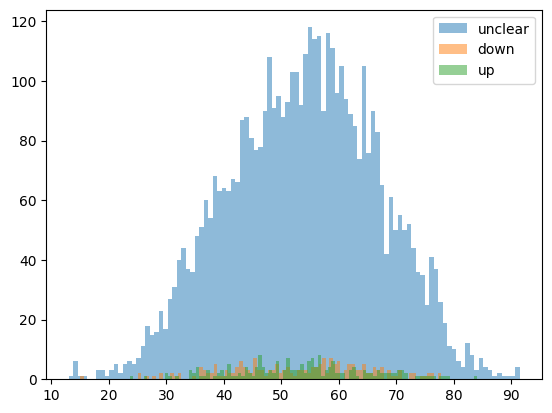

In [38]:
from matplotlib import pyplot # you can also combine 2-3 technical indicators 

# The code you provided is creating histograms of the Relative Strength Index (RSI) values for three different trend categories: up, down, and unclear.
#  The RSI is a momentum oscillator that measures the speed and change of price movements. It is often used as a trend indicator in technical analysis of financial
#  markets.
# Here’s what you should look for in the histograms to determine if RSI alone is sufficient as a trend indicator:

#     Separation of Distributions: If the distributions of RSI values for the up, down, and unclear trends are well separated
#  (i.e., they do not overlap significantly), it suggests that the RSI values are distinct for each trend category. 
# This would indicate that RSI alone could be a good indicator of the trend.

#     Overlap of Distributions: If the distributions overlap significantly, it suggests that the RSI values are not distinct for each trend category. In this case, RSI alone might not be sufficient to reliably indicate the trend.

#     Shape of Distributions: The shape of the distributions can also provide insights. For example, if the distribution for the up trend is skewed towards higher RSI values and the distribution for the down trend is skewed towards lower RSI values, this would suggest that RSI is a good indicator of the trend.

df_up=df.RSI[ df['mytarget'] == 2 ] #uprtrend 2
df_down=df.RSI[ df['mytarget'] == 1 ] #downtrend 1
df_unclear=df.RSI[ df['mytarget'] == 0 ] # unclear trend 0
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear') #alpha is transparency #bin  the number of equal-width bins in the range of the data. The bins are the divisions in the histogram that represent the width of the intervals. For example, if bins=100, it means the data will be divided into 100 equal-width bins when creating the histogram.
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

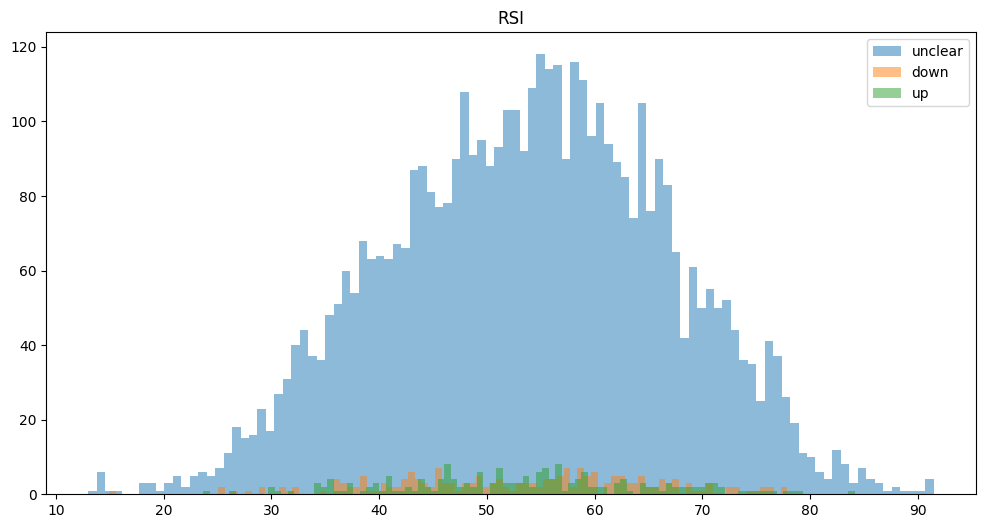

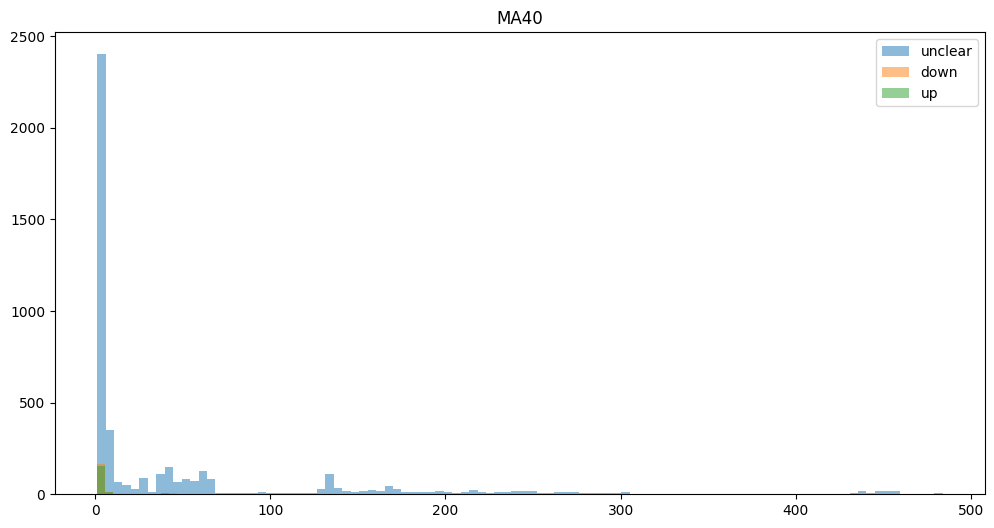

In [41]:
#i added this
from matplotlib import pyplot

# Create subsets of the data for each trend category
df_up = df[['RSI', 'MA40']][df['mytarget'] == 2]  # uptrend
df_down = df[['RSI', 'MA40']][df['mytarget'] == 1]  # downtrend
df_unclear = df[['RSI', 'MA40']][df['mytarget'] == 0]  # unclear trend

# Create histograms for RSI
pyplot.figure(figsize=(12, 6))
pyplot.hist(df_unclear['RSI'], bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down['RSI'], bins=100, alpha=0.5, label='down')
pyplot.hist(df_up['RSI'], bins=100, alpha=0.5, label='up')
pyplot.title('RSI')
pyplot.legend(loc='upper right')
pyplot.show()

# Create histograms for MA40
pyplot.figure(figsize=(12, 6))
pyplot.hist(df_unclear['MA40'], bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down['MA40'], bins=100, alpha=0.5, label='down')
pyplot.hist(df_up['MA40'], bins=100, alpha=0.5, label='up')
pyplot.title('MA40')
pyplot.legend(loc='upper right')
pyplot.show()

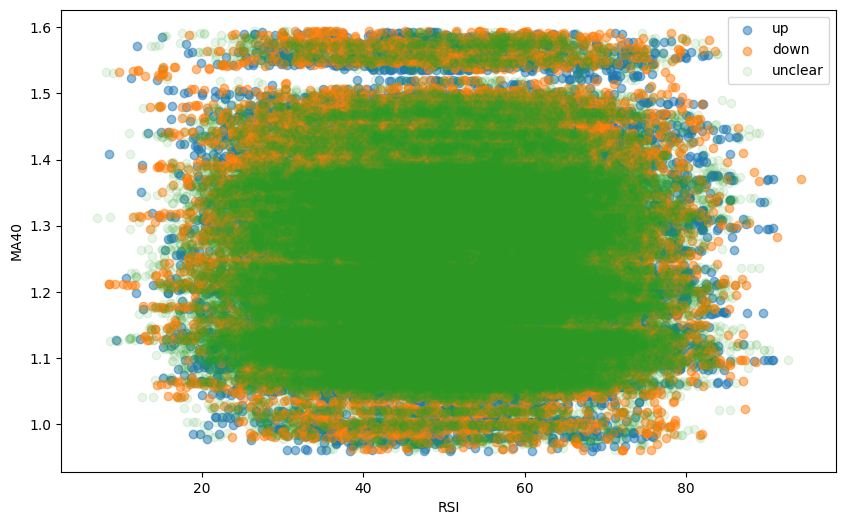

In [15]:
# i added this 
# import matplotlib.pyplot as plt

# # Create scatter plots for each trend category
# plt.figure(figsize=(10, 6))
# plt.scatter(df_up['RSI'], df_up['MA40'], alpha=0.5, label='up')
# plt.scatter(df_down['RSI'], df_down['MA40'], alpha=0.5, label='down')
# plt.scatter(df_unclear['RSI'], df_unclear['MA40'], alpha=0.1, label='unclear')

# plt.xlabel('RSI')
# plt.ylabel('MA40')
# plt.legend(loc='upper right')
# plt.show()

# Machine learning for trend prediction

## 1 - the perfect model with precise prediction

## 2 - less perfect model still with > 40% precision

## 3 - much less perfect model with precision >35% taking into account our strategy, and our TP/SL ratio 

### can't let an automated program run your trades
### it can be your version of a smart indicator (based on machine learning)

## 4 - Our target has categorical values so we need a classificator, KNN?

## Splitting features and target

In [42]:
df_model=df_model.dropna() # cleaning the rows with no numbers data 

attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["mytarget"]

print(X)

            ATR        RSI    Average        MA40        MA80       MA160   
164    0.069367  43.171547    1.03210    1.213225    1.493081    1.724189  \
165    0.068439  46.952496    1.03210    1.196350    1.484904    1.717871   
166    0.065977  47.171042    1.04040    1.180163    1.477029    1.711454   
167    0.064428  48.981874    1.06955    1.166433    1.468060    1.705115   
168    0.063121  45.945950    1.06750    1.152370    1.458456    1.698365   
...         ...        ...        ...         ...         ...         ...   
5033  12.861618  49.987041  484.89000  480.477000  457.980000  440.513125   
5034  12.651037  46.683364  483.07500  481.118000  458.229625  441.676625   
5035  12.514485  49.269347  479.10000  481.679750  458.582125  442.850687   
5036  12.663261  55.256472  485.27500  482.465250  459.110500  444.033125   
5037  13.619098  67.220435  502.90500  483.885000  459.956500  445.319062   

      slopeMA40  slopeMA80  slopeMA160  AverageSlope  RSISlope  
164   -0.0

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Fitting the KNN model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Quick evaluation of our fitting

In [45]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0)) # quanto accurato e' uno che gioca casualmente

Accuracy train: 92.25%
Accuracy test: 93.03%
mytarget
0.0    92.407141
1.0     3.857993
2.0     3.734866
Name: count, dtype: float64
Accuracy Gambler: 34.56%


## More powerful model XGBoost

In [46]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 99.9743%
****Test Results****
Accuracy: 92.6154%


## !!Data sampling shouldn't be random

In [47]:
#random sampling
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#sequential sampling, the candles need to be predicted in a consequential way 
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 99.9743%
****Test Results****
Accuracy: 98.2564%


## Which features are most important for our model?

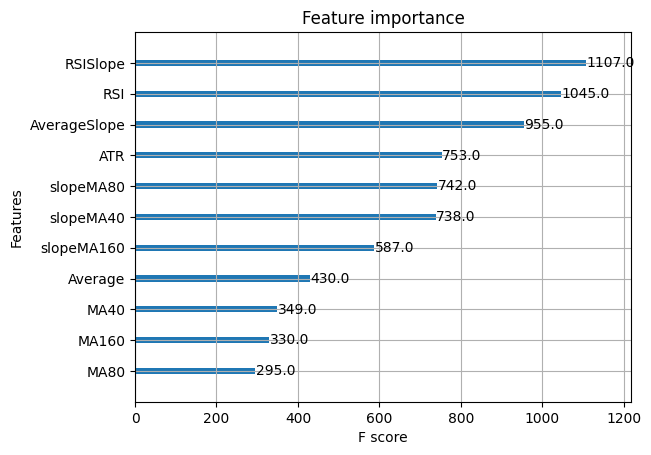

In [48]:
from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()

# Automated orders using python and Machine Learning
## Previous videos
### 1 - Install Anaconda, Jupyter NB, Pandas_TA (Technical Analysis)
### 2 - Download price data from online resources, and add our technical indicators to our exchange price dataframe
### 3 - Fit a Machine learning model and predict future price trends using KNN and XGBOOST classifiers
### 4 - Save and Load a ML model,
### - according to the model's advice
### - passing orders (sell/buy) automatically
### - send an email notification about newly applied trading operations

## Load Machine Learning Model from Disk and Test it

In [19]:
# import joblib

# # save your ML model to disk
# filename = 'mymodel1.sav'
# joblib.dump(model, filename)

# #load the model from disk
# loaded_model = joblib.load('mymodel1.sav')

## Live Automated Orders with email notification

In [32]:
# from apscheduler.schedulers.blocking import BlockingScheduler
# import json
# from oandapyV20 import API
# import oandapyV20.endpoints.orders as orders
# from oandapyV20.contrib.requests import MarketOrderRequest
# from oanda_candles import Pair, Gran, CandleCollector
# from oandapyV20.contrib.requests import TakeProfitDetails, StopLossDetails


# import smtplib
# gmail_user = 'email@gmail.com'
# gmail_password = 'email password here'
# sent_from = gmail_user
# to = ['email@gmail.com']
# subject = 'info CHF'


In [30]:
# ModelPrediction = 0
# def some_job():
#     access_token="INSERT TOKEN HERE, YOU GET IT FROM YOUR OANDA ACCOUNT"
#     collector = CandleCollector(access_token, Pair.USD_CHF, Gran.H4)
#     candles = collector.grab(2*161)

#     dfstream = pd.DataFrame(columns=['Open','Close','High','Low'])
#     i=0
#     for candle in candles:
#         dfstream.loc[i, ['Open']] = float(str(candle.bid.o))
#         dfstream.loc[i, ['Close']] = float(str(candle.bid.c))
#         dfstream.loc[i, ['High']] = float(str(candle.bid.h))
#         dfstream.loc[i, ['Low']] = float(str(candle.bid.l))
#         i=i+1

#     dfstream['Open'] = dfstream['Open'].astype(float)
#     dfstream['Close'] = dfstream['Close'].astype(float)
#     dfstream['High'] = dfstream['High'].astype(float)
#     dfstream['Low'] = dfstream['Low'].astype(float)

#     #dfstream['Average'] = (dfstream['High']+dfstream['Low'])/2
#     #dfstream['MA40'] = dfstream['Open'].rolling(window=40).mean()
#     #dfstream['MA80'] = dfstream['Open'].rolling(window=80).mean()
#     #dfstream['MA160'] = dfstream['Open'].rolling(window=160).mean()
    
#     import numpy as np
#     import pandas_ta as ta
#     #attributes=['ATR', 'RSI', 'Average', 
#     #'MA40', 'MA80', 'MA160', 'slopeMA40', 
#     #'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
#     dfstream['ATR'] = dfstream.ta.atr(length=20)
#     dfstream['RSI'] = dfstream.ta.rsi()
#     dfstream['Average'] = dfstream.ta.midprice(length=1) #midprice
#     dfstream['MA40'] = dfstream.ta.sma(length=40)
#     dfstream['MA80'] = dfstream.ta.sma(length=80)
#     dfstream['MA160'] = dfstream.ta.sma(length=160)

# #from scipy.stats import linregress
# #def get_slope(array):
# #    y = np.array(array)
# #    x = np.arange(len(y))
# #    slope, intercept, r_value, p_value, std_err = linregress(x,y)
# #    return slope

#     #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#     backrollingN = 6
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#     dfstream['slopeMA40'] = dfstream['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
#     dfstream['slopeMA80'] = dfstream['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
#     dfstream['slopeMA160'] = dfstream['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
#     dfstream['AverageSlope'] = dfstream['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
#     dfstream['RSISlope'] = dfstream['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

#     #________________________________________________________________________________________________
#     X_stream = dfstream.iloc[[320]]# !!! Index takes last CLOSED candle
#     #attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 
#     #'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
#     X_model = X_stream[attributes]
    
#     # Apply the model for predictions
#     ModelPrediction = loaded_model.predict(X_model)
  
#     msg = str(ModelPrediction) # 0 no clear trend, 1 downtrend, 2 uptrend
#     #------------------------------------
#     # send email with 
#     server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
#     server.ehlo()
#     server.login(gmail_user, gmail_password)
#     server.sendmail(sent_from, to, msg)
#     server.close()
#     #________________________________________________________________________________________________
    
    
#     # EXECUTING ORDERS
#     accountID = "1432-432-0000" #use your account ID
#     client = API(access_token)

#     candles = collector.grab(1)
# #    for candle in candles:
# #        print(candle.bid.o)
# #        print(candle.bid.c)
    
#     pipdiff = 500*1e-5 #for TP
#     SLTPRatio = 2 #pipdiff/Ratio gives SL
    
#     TPBuy = float(str(candle.bid.o))+pipdiff
#     SLBuy = float(str(candle.bid.o))-(pipdiff/SLTPRatio)
#     TPSell = float(str(candle.bid.o))-pipdiff
#     SLSell = float(str(candle.bid.o))+(pipdiff/SLTPRatio)
    
#     #Sell
#     if ModelPrediction == 1:
#         mo = MarketOrderRequest(instrument="USD_CHF", units=-1000, takeProfitOnFill=TakeProfitDetails(price=TPSell).data, stopLossOnFill=StopLossDetails(price=SLSell).data)
#         r = orders.OrderCreate(accountID, data=mo.data)
#         rv = client.request(r)
#         print(rv)
#     #Buy
#     elif ModelPrediction == 2:
#         mo = MarketOrderRequest(instrument="USD_CHF", units=1000, takeProfitOnFill=TakeProfitDetails(price=TPBuy).data, stopLossOnFill=StopLossDetails(price=SLBuy).data)
#         r = orders.OrderCreate(accountID, data=mo.data)
#         rv = client.request(r)
#         print(rv)

## Executing orders automatically every 4 Hours

In [33]:
# #some_job()

# ###################################################################
# ## Interval time job ##############################################
# scheduler = BlockingScheduler(job_defaults={'misfire_grace_time': 15*60})
# scheduler.add_job(some_job, 'cron', day_of_week='mon-fri', hour='*/4', minute=5, jitter=120, timezone='America/New_York')
# #scheduler.add_job(some_job, 'interval', hours=4)
# scheduler.start()

V20Error: {"errorMessage":"Insufficient authorization to perform request."}